In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df  = pd.read_csv('EPL_18_24_data.csv', index_col=0, parse_dates=['Date'])
df.head()

,Date,Time,Location,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AR,AvgH,AvgD,AvgA,Elo_HomeTeam,Elo_AwayTeam,Temperature,Humidity,Wind Speed,Condition
0,2024-04-25,20:00,EGKK,Brighton,Man City,0,4,A,0,3,...,0,6.568,4.890,1.426,1748.398682,2038.480591,44.750000,78.125000,5.687500,Fair
1,2024-04-24,20:00,EGCC,Man United,Sheffield United,4,2,H,1,1,...,0,1.304,6.056,8.154,1793.209839,1551.766602,44.979167,62.333333,7.062500,Mostly Cloudy
2,2024-04-24,20:00,EGGP,Everton,Liverpool,2,0,H,1,0,...,0,7.048,4.910,1.410,1692.962402,1923.581787,45.833333,65.523810,7.595238,Partly Cloudy
3,2024-04-24,20:00,EGLC,Crystal Palace,Newcastle,2,0,H,0,0,...,0,2.742,3.620,2.410,1708.831055,1811.576782,45.979167,59.250000,7.604167,Fair
4,2024-04-24,19:45,EGBB,Wolves,Bournemouth,0,1,A,0,1,...,1,2.698,3.586,2.476,1711.067993,1695.033447,43.958333,69.208333,6.520833,Fair


## Анализ столбцов

In [3]:
df.columns

Index(['Date', 'Time', 'Location', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF',
       'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'AvgH', 'AvgD', 'AvgA',
       'Elo_HomeTeam', 'Elo_AwayTeam', 'Temperature', 'Humidity', 'Wind Speed',
       'Condition'],
      dtype='object')

### Организационное
- Date - дата начала матча (YY-MM-DD)
- Time - время начала матча (HH:MM)
- Location - код города, в котором проходил матч. Нужен для отслеживания погоды во время матча
- HomeTeam, AwayTeam - команда, которая играет на своем стадине (домашняя) и команда, приехавшая в гости
---
### Голы и результат матча
__Команда, которая забила больше побеждает. Если голов одинаковое количество, то ничья. По этим колонкам оценивается конечный и промежуточный результат матча__
- FTHG - сколько голов забила домашняя команда за весь матч
- FTAG - сколько голов забила гостевая команда за весь матч
- FTR - результат матча (победа домашней команды: H; победа гостевой команды: A, ничья: D)
- HTHG сколько голов забила домашняя команда за первый тайм (из двух)
- HTAG сколько голов забила гостевая команда за первый тайм (из двух)
- HTR - результат первого тайма (победа домашней команды: H; победа гостевой команды: A, ничья: D)
---
### Судья
__Судьи имеют разные характеры и многие моменты могут судить по-разному. Бывают более строгие судьи (обычно на их матчах больше желтых и красных карточек). Это может влиять на процесс игры. Например, командам с жестким стилем игры у строгих судей сложнее играть и выигрывать.__
- Referee - имя судьи. 
### Удары по воротам
__Удары по воротам говорят о том, как активно атаковала команда: чем больше, тем лучше__
- HS - количество ударов по воротам у домашней команды
- AS - количество ударов по воротам у гостевой команды
- HST - количество попаданий по воротам у домашней команды
- AST - количество попаданий по воротам у гостевой команды
---
### Угловые удары
Угловой удар назначается, когда мяч, последний раз коснувшись игрока обороняющейся команды, полностью пересёк линию ворот по земле или по воздуху, и при этом не был забит гол. Иными словами, если мяч ушел за линию, но не в ворота

__Еще один показатель интенсивности атак команды. Чем больше, тем лучше__
- HC - количество угловых ударов у домашней команды
- AC - количество угловых ударов у гостевой команды
---
### Нарушения правил
__Показывают, насколько грубо играла команда. На первый взгляд не очевидно, как это влияет на результат игры__
- HF - количество нарушений правил у домашней команды
- AF - количество нарушений правил у гостевой команды
---
### Желтые и красные карточки
__Показатель сильных нарушений правил. Например, если у команды есть красная карточка (то есть удален один игрок), ее шансы на победу снижаются__
- HY - количество желтых карточек у домашней команды
- AY - количество желтых карточек у гостевой команды
- HR - количество красных карточек у домашней команды
- AR - количество красных карточек у гостевой команды
--- 
### Коэффициенты букмекеров
__По этим признакам будем оценивать, насколько в каждую из команд верили профессиональные аналитики. Чем выше коэффициент, тем менее вероятен исход по мнению букмекерских контор__
- AVGH (кастомный признак) - средние коэффициенты у букмекеров на победу домашней команды
- AVGD (кастомный признак) - средние коэффициенты у букмекеров на ничью
- AVGA (кастомный признак) - средние коэффициенты у букмекеров на победу гостевой команды
---
### Elo Rating
__Показатель исторической силы команды. За какой-то промежуток времени команды сыграли много матчей. В некоторых из них они превосходили ожидания и побеждали сильных соперников и получали за это большие баллы в Elo Rating, а в некоторых не оправдывали ожиданий и проигрывали слабым (за это они теряли баллы Elo Rating. На момент игры известен рейтинг команды. Чем он больше, тем сильнее команда__
- Elo_HomeTeam (из другого датасета) - значение Elo rating у домашней команды. Отражает силу команды
- Elo_AwayTeam (из другого датасета) - значение Elo rating у гостевой команды. Отражает силу команды
---
### Погода
__Погода может влиять на исход матча: кому-то может быть некомфортно играть в дождь, а кто-то в этом профессионал. Эти признаки позволят понять, как влияют на матчи и более продвинутые показатели типа температуры, влажности и скорости ветра__
- Temperature (спарсил с сайта weather underground) - средняя температура во время матча (+- 20-30 минут)
- Humidity (спарсил с сайта weather underground) - средняя влажность во время матча (+- 20-30 минут)
- Wind speed (спарсил с сайта weather underground) - средняя скорость ветра во время матча (+- 20-30 минут)
- Condition (спарсил с сайта weather underground) - общее состояние погоды во время матча (+- 20-30 минут)

## Пропуски

In [4]:
df.isna().sum()

Date            0
Time            0
Location        0
HomeTeam        0
AwayTeam        0
FTHG            0
FTAG            0
FTR             0
HTHG            0
HTAG            0
HTR             0
Referee         0
HS              0
AS              0
HST             0
AST             0
HF              0
AF              0
HC              0
AC              0
HY              0
AY              0
HR              0
AR              0
AvgH            0
AvgD            0
AvgA            0
Elo_HomeTeam    0
Elo_AwayTeam    0
Temperature     0
Humidity        0
Wind Speed      0
Condition       0
dtype: int64

#### Пропусков нет
В процессе соединения данных в один датафрейм ([4] data_merge.ipynb) были решены проблемы с пропусками

In [5]:
df.columns

Index(['Date', 'Time', 'Location', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF',
       'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'AvgH', 'AvgD', 'AvgA',
       'Elo_HomeTeam', 'Elo_AwayTeam', 'Temperature', 'Humidity', 'Wind Speed',
       'Condition'],
      dtype='object')

### Даты

Взят промежуток с 10 августа 2018 года до 25 апреля 2024 года

In [6]:
df.Date

0      2024-04-25
1      2024-04-24
2      2024-04-24
3      2024-04-24
4      2024-04-24
          ...    
2159   2018-08-11
2160   2018-08-11
2161   2018-08-11
2162   2018-08-11
2163   2018-08-10
Name: Date, Length: 2164, dtype: datetime64[ns]

__Распределение игр по месяцам__

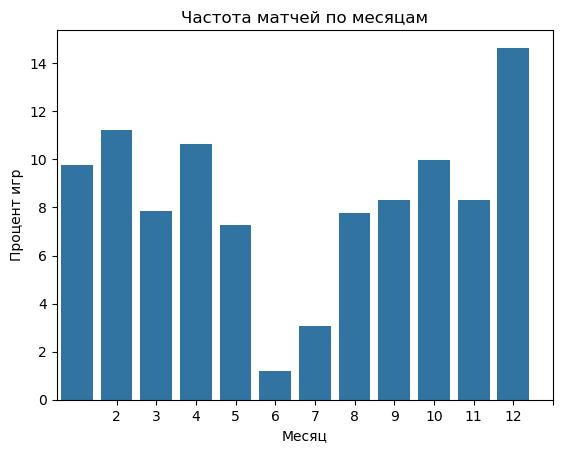

In [104]:
sns.countplot(data=df, x=df['Date'].apply(lambda x: x.month), stat='percent')

plt.xticks(np.arange(1, 13))
plt.xlabel('Месяц')
plt.ylabel('Процент игр')
plt.title('Частота матчей по месяцам');

- Чаще всего игры проводят в декабре, а реже всего - в июне

- Получается, что летом игры проводятся меньше, чем зимой

### Команды

Посмотрим, как много команды играли в английской премьер лиге

<Axes: xlabel='count', ylabel='HomeTeam'>

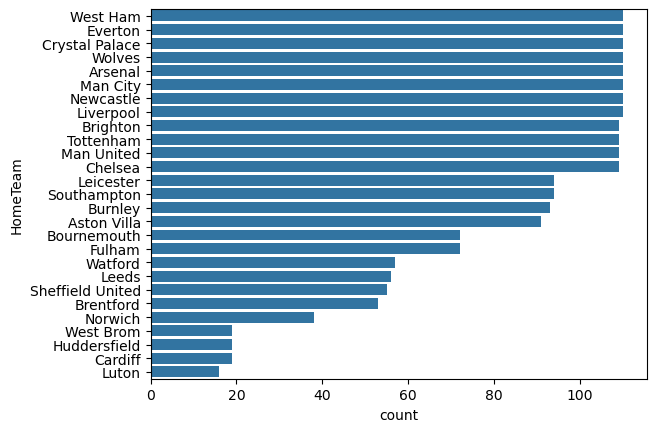

In [88]:
sns.countplot(df.HomeTeam, order=df['HomeTeam'].value_counts().index)

Команды играют разное количество матчей, потому что многие вылетали из этой лиги в низшую из-за плохих результатов. Постояльцы лиги - почти половина рассматриваемых команд. Хаддерсфилд, Кардифф, Лутон - играли в лиге всего один сезон с 2018 года

### Голы

In [89]:
df.columns

Index(['Date', 'Time', 'Location', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF',
       'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'AvgH', 'AvgD', 'AvgA',
       'Elo_HomeTeam', 'Elo_AwayTeam', 'Temperature', 'Humidity', 'Wind Speed',
       'Condition'],
      dtype='object')

Посмотрим, как голы забивали команды, играющие в гостях и дома

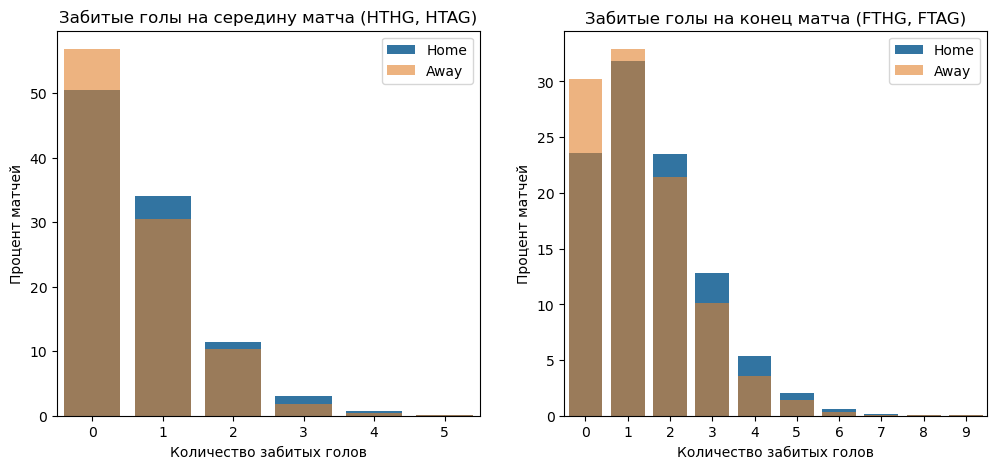

In [210]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
sns.countplot(data=df, x=df.FTHG, alpha=1, stat='percent', label='Home')
sns.countplot(data=df, x=df.FTAG, alpha=0.6, stat='percent', label='Away')

plt.legend()
plt.xlabel('Количество забитых голов')
plt.ylabel('Процент матчей')
plt.title('Забитые голы на конец матча (FTHG, FTAG)')


plt.subplot(1, 2, 1)
sns.countplot(data=df, x=df.HTHG, alpha=1, stat='percent', label='Home')
sns.countplot(data=df, x=df.HTAG, alpha=0.6, stat='percent', label='Away')

plt.legend()
plt.xlabel('Количество забитых голов')
plt.ylabel('Процент матчей')
plt.title('Забитые голы на середину матча (HTHG, HTAG)');

__Вывод:__ 
- Домашние команды чаще забивают больше 1 гола, чем гостевые команды. Это может говорить о том, что домашние команды имеют преимущество и чаще побеждают, забивая больше
- На момент первой половины матча забивают меньше голов. В половине матчей гостевая или домашняя команды вообще не забивали, зато на момент конца игры таких матчей около 30 процентов

### Результаты матчей

Посмотрим, как результат матча зависит от того, играет команда дома или нет

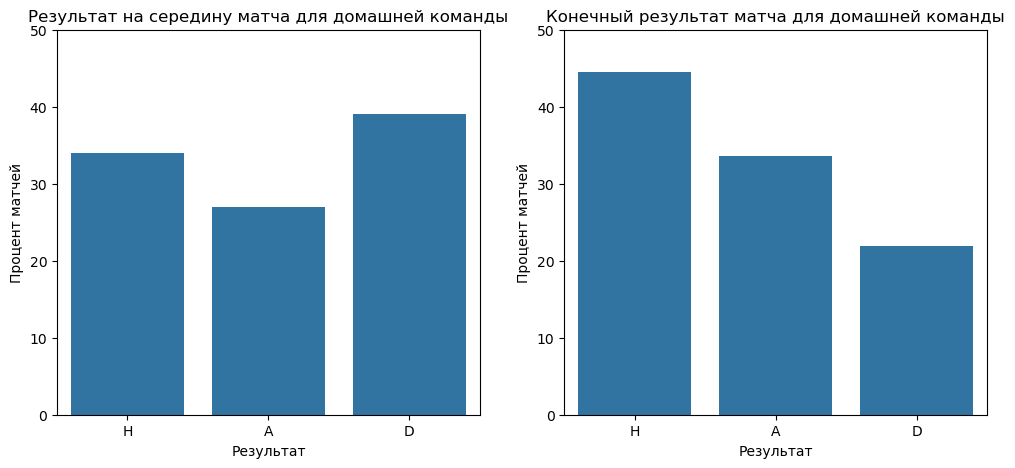

In [166]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
sns.countplot(data=df, x=df.FTR, order=df['FTR'].value_counts().index, stat='percent')

plt.xlabel('Результат')
plt.ylabel('Процент матчей')
plt.title('Конечный результат матча для домашней команды')
plt.ylim(0, 50)


plt.subplot(1, 2, 1)
sns.countplot(data=df, x=df.HTR, order=df['FTR'].value_counts().index, stat='percent')
plt.xlabel('Результат')
plt.ylabel('Процент матчей')
plt.title('Результат на середину матча для домашней команды')
plt.ylim(0, 50);

__Вывод:__ 
- В середине матча чаще всего команды еще играют вничью, зато к концу матча ничья будет реже всего и побеждает чаще домашняя команда
- Заметно, что и в середине, и в конце домашняя команда в среднем играет лучше гостевой

### Игровая статистика

#### Удары по воротам

Посмотрим на распределение ударов по воротам в зависимости от того, дома играет команда или нет

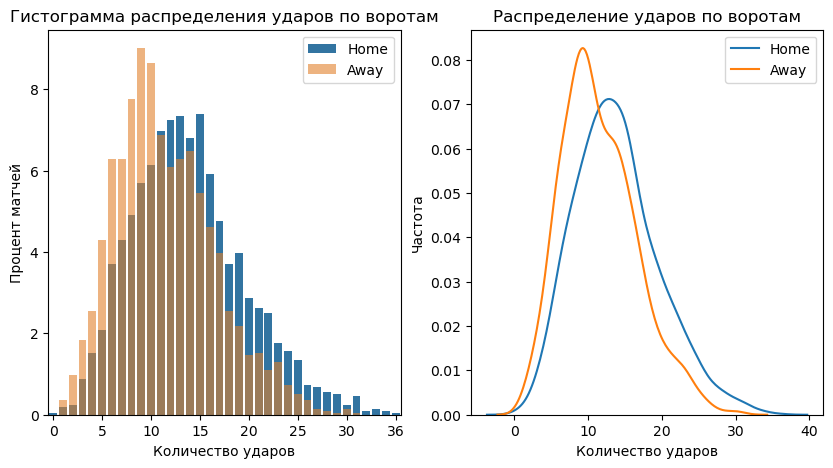

In [207]:
# Удары по воротам

plt.figure(figsize=(10, 5))

# 1 график
plt.subplot(1, 2, 1)
sns.countplot(data=df, x=df.HS, stat='percent', label='Home')
sns.countplot(data=df, x=df.AS, stat='percent', label='Away', alpha=0.6)

plt.xticks(np.arange(0, max(df.HS), 5))
plt.xlabel('Количество ударов')
plt.ylabel('Процент матчей')
plt.title('Гистограмма распределения ударов по воротам')
plt.legend()

# 2 график
plt.subplot(1, 2, 2)
sns.kdeplot(df.HS, label='Home')
sns.kdeplot(df.AS, label='Away')

plt.xlabel('Количество ударов')
plt.ylabel('Частота')
plt.title('Распределение ударов по воротам')
plt.legend();

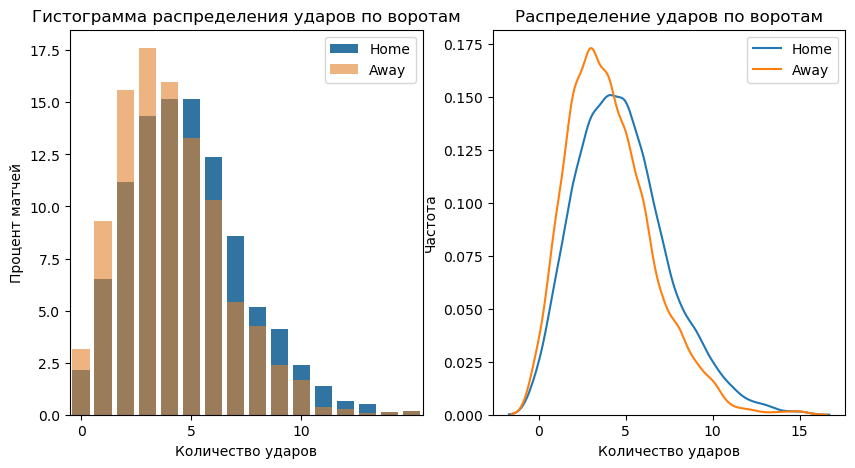

In [208]:
# Попадания по воротам

plt.figure(figsize=(10, 5))

# 1 график
plt.subplot(1, 2, 1)
sns.countplot(data=df, x=df.HST, stat='percent', label='Home')
sns.countplot(data=df, x=df.AST, stat='percent', label='Away', alpha=0.6)

plt.xticks(np.arange(0, max(df.HST), 5))
plt.xlabel('Количество ударов')
plt.ylabel('Процент матчей')
plt.title('Гистограмма распределения ударов по воротам')
plt.legend()

# 1 график
plt.subplot(1, 2, 2)
sns.kdeplot(df.HST, label='Home')
sns.kdeplot(df.AST, label='Away')

plt.xlabel('Количество ударов')
plt.ylabel('Частота')
plt.title('Распределение ударов по воротам')
plt.legend();

__Вывод:__ 
- Домашние команды чаще бьют по воротам и чаще попадают по ним, чем гостевые команды
- Это еще один признак того, что домашние играют лучше гостевых

### Угловые удары

Угловой удар - это хорошая возможность забить гол. Посмотрим, как количество угловых влияет на результат домашней команды

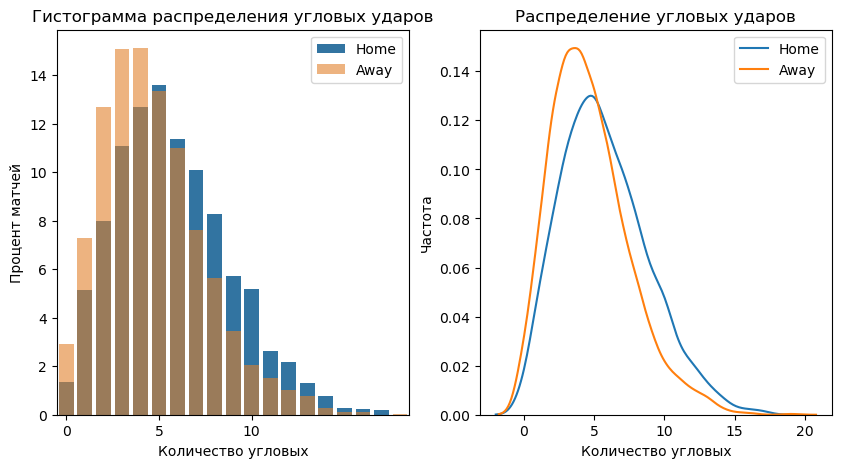

In [212]:
# Угловые

plt.figure(figsize=(10, 5))

# 1 график
plt.subplot(1, 2, 1)
sns.countplot(data=df, x=df.HC, stat='percent', label='Home')
sns.countplot(data=df, x=df.AC, stat='percent', label='Away', alpha=0.6)

plt.xticks(np.arange(0, max(df.HST), 5))
plt.xlabel('Количество угловых')
plt.ylabel('Процент матчей')
plt.title('Гистограмма распределения угловых ударов')
plt.legend()

# 1 график
plt.subplot(1, 2, 2)
sns.kdeplot(df.HC, label='Home')
sns.kdeplot(df.AC, label='Away')

plt.xlabel('Количество угловых')
plt.ylabel('Частота')
plt.title('Распределение угловых ударов')
plt.legend();

__Вывод:__ действительно, угловые чаще появляются у домашних команд, которые чаще выигрывают

Часто мяч после удара по воротам улетает за линию и после этого назначается угловой удар, поэтому количество угловых должно коррелировать с ударами.  
# На это посмотрим на другой большой хитмапе

### Нарушения правил

Проигрывающая команда часто может быть более агрессивной из-за нужды в отыгрыше и эмоций от проигрывания. Тем не менее, для некоторых команд агрессивная игра - собственный стиль и это может не коррелировать с результатом игры. 
- Посмотрим, как количество нарушений правил зависит от того, где играет команда
- Посмотрим на среднее количество нарушений у разных команд
- Посмотрим, как судья влияет на количество нарушений

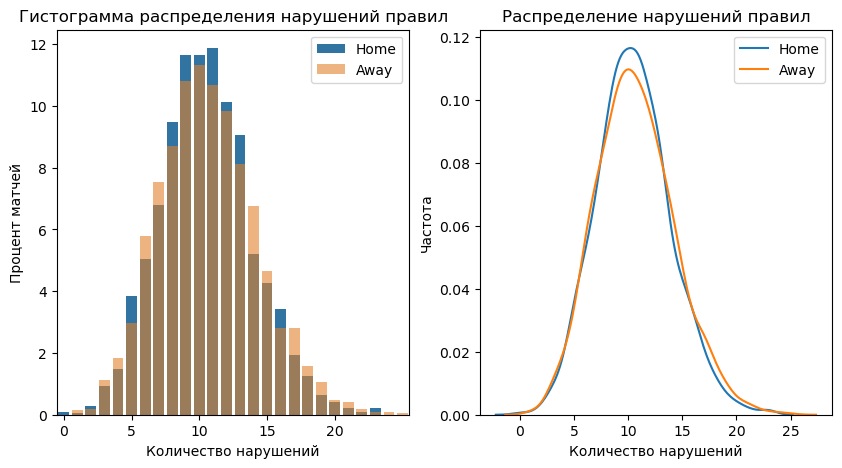

In [213]:
# Нарушения

plt.figure(figsize=(10, 5))

# 1 график
plt.subplot(1, 2, 1)
sns.countplot(data=df, x=df.HF, stat='percent', label='Home')
sns.countplot(data=df, x=df.AF, stat='percent', label='Away', alpha=0.6)

plt.xticks(np.arange(0, max(df.HF), 5))
plt.xlabel('Количество нарушений')
plt.ylabel('Процент матчей')
plt.title('Гистограмма распределения нарушений правил')
plt.legend()

# 1 график
plt.subplot(1, 2, 2)
sns.kdeplot(df.HF, label='Home')
sns.kdeplot(df.AF, label='Away')

plt.xlabel('Количество нарушений')
plt.ylabel('Частота')
plt.title('Распределение нарушений правил')
plt.legend();

__Вывод:__ похоже на то, что в целом ситуация по нарушениям не зависит от роли команды, но распределения похожи на нормальное и у домашних команд имеет более тонкие хвосты

### Желтые и красные карточки

В целом, они тоже отражают нарушения правил, но более жесткие. 
- За серьезное нарушение дают желтую карточку. Получив две таких карточки в одном матче, футболист удаляется с поля и у команды остается на одного игрока меньше
- За очень серьезное нарушение дают красную карточку. Она работает так же, как две желтые

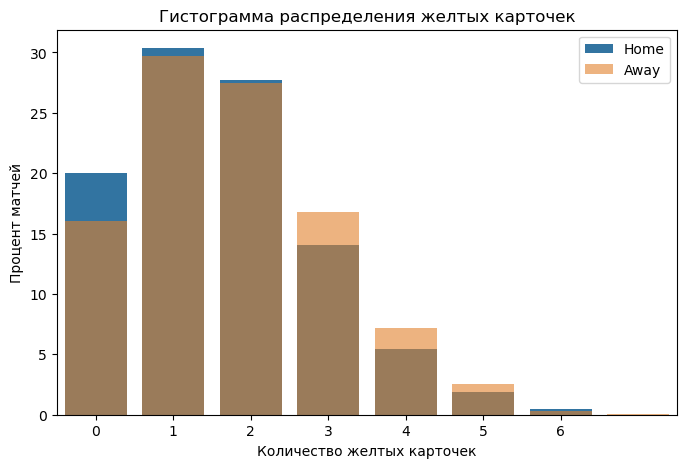

In [225]:
# Желтые

plt.figure(figsize=(8, 5))

# 1 график
sns.countplot(data=df, x=df.HY, stat='percent', label='Home')
sns.countplot(data=df, x=df.AY, stat='percent', label='Away', alpha=0.6)

plt.xticks(np.arange(0, max(df.HY) + 1))
plt.xlabel('Количество желтых карточек')
plt.ylabel('Процент матчей')
plt.title('Гистограмма распределения желтых карточек')
plt.legend()

__Вывод:__ интересная статистика, гостевые команды обычно получают больше желтых карточек. Возможно, наша гипотеза может подтвердиться

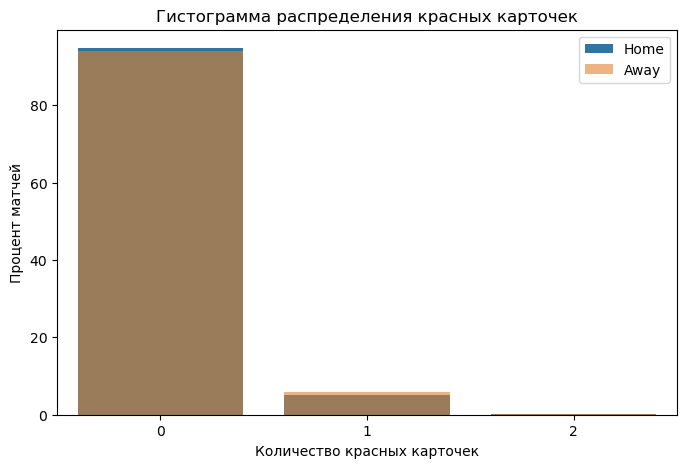

In [227]:
# Красные

plt.figure(figsize=(8, 5))

# 1 график
sns.countplot(data=df, x=df.HR, stat='percent', label='Home')
sns.countplot(data=df, x=df.AR, stat='percent', label='Away', alpha=0.6)

plt.xticks(np.arange(0, max(df.HR) + 1))
plt.xlabel('Количество красных карточек')
plt.ylabel('Процент матчей')
plt.title('Гистограмма распределения красных карточек')
plt.legend()

__Вывод:__ С красными карточками такой ситуации не наблюдается. Скорее всего потому что их получают слишком редко

### Нарушения по командам

Посчитаем среднее количество нарушений и желтых карточек у разных команд и посмотрим как рейтинг силы (Elo rating) с этим связан

In [250]:
df.loc[:, ['HomeTeam', 'AwayTeam', 'HF', 'AF', 'HY', 'AY', 'HR', 'AY', 'Referee', 'Elo_HomeTeam', 'Elo_AwayTeam']].head()

,HomeTeam,AwayTeam,HF,AF,HY,AY,HR,AY,Referee,Elo_HomeTeam,Elo_AwayTeam
0,Brighton,Man City,10,3,2,0,0,0,J Gillett,1748.398682,2038.480591
1,Man United,Sheffield United,7,9,0,1,0,1,M Salisbury,1793.209839,1551.766602
2,Everton,Liverpool,6,13,0,3,0,3,A Madley,1692.962402,1923.581787
3,Crystal Palace,Newcastle,10,15,3,3,0,3,T Bramall,1708.831055,1811.576782
4,Wolves,Bournemouth,10,17,4,1,0,1,S Attwell,1711.067993,1695.033447


Так как столбцы отдельно задают информацию для домашней и гостевой команд, соединим

In [254]:
df_fouls = pd.concat([df.loc[:, ['HomeTeam', 'HF', 'HY','HR', 'Referee', 'Elo_HomeTeam']].rename(columns=
                                                                                            {'HomeTeam': 'Team',
                                                                                              'HF': 'F',
                                                                                              'HY': 'Y',
                                                                                              'HR': 'R',
                                                                                             'Elo_HomeTeam': 'Elo'}), 
                      df.loc[:, ['AwayTeam', 'AF', 'AY', 'AR', 'Referee', 'Elo_AwayTeam']].rename(columns=
                                                                                            {'AwayTeam': 'Team',
                                                                                               'AF': 'F',
                                                                                               'AY': 'Y',
                                                                                               'AR': 'R',
                                                                                              'Elo_AwayTeam': 'Elo'})],
                    ignore_index=True)
df_fouls

,Team,F,Y,R,Referee,Elo
0,Brighton,10,2,0,J Gillett,1748.398682
1,Man United,7,0,0,M Salisbury,1793.209839
2,Everton,6,0,0,A Madley,1692.962402
3,Crystal Palace,10,3,0,T Bramall,1708.831055
4,Wolves,10,4,0,S Attwell,1711.067993
...,...,...,...,...,...,...
4323,Tottenham,12,2,0,M Atkinson,1914.848877
4324,Chelsea,8,1,0,C Kavanagh,1837.004272
4325,Crystal Palace,11,2,0,M Dean,1692.951660
4326,Cardiff,9,1,0,K Friend,1576.490356


Сгруппируем показатели по командам:

In [281]:
df_fouls_grouped = df_fouls.groupby('Team')[['F', 'Y', 'R', 'Elo']].agg('mean')
df_fouls_grouped.sort_values('F')

,F,Y,R,Elo
Team,,,,
Man City,8.881818,1.272727,0.045455,2016.823592
Norwich,9.460526,1.605263,0.065789,1611.759221
West Ham,9.477273,1.472727,0.045455,1750.927937
Brentford,9.716981,1.783019,0.056604,1736.850369
Liverpool,9.913636,1.259091,0.045455,1981.093069
Arsenal,10.086364,1.654545,0.081818,1865.481718
Cardiff,10.105263,1.710526,0.026316,1567.468981
Leicester,10.250000,1.414894,0.058511,1765.810163
Burnley,10.389189,1.702703,0.048649,1684.290753


<Axes: xlabel='F', ylabel='Team'>

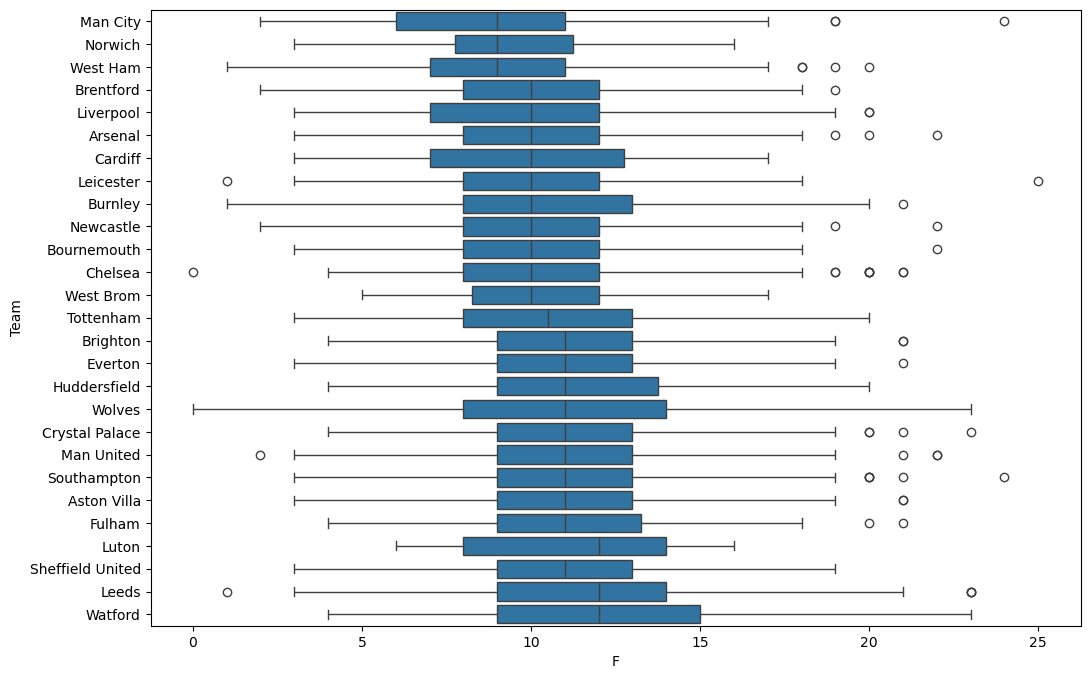

In [277]:
plt.figure(figsize=(12, 8))

sns.boxplot(data=df_fouls, x='F', y='Team', order=(df_fouls_grouped.sort_values('F')).index)

__Вывод:__ 
- Самые фолящие команды Watford, Leeds, Sheffield и т.д. - команды-аутсайдеры, они часто вылетают из лиги

Посмотрим на зависимость между количеством фолов и рейтингом силы 

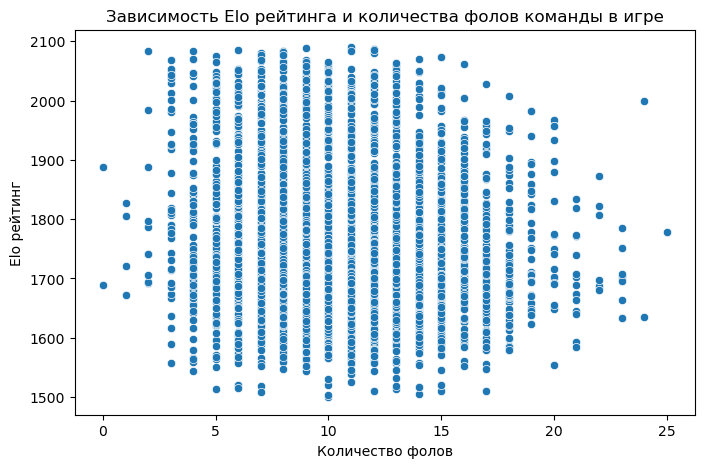

In [289]:
plt.figure(figsize=(8, 5))
plt.title('Зависимость Elo рейтинга и количества фолов команды в игре')
plt.xlabel('Количество фолов')
plt.ylabel('Elo рейтинг')

sns.scatterplot(data=df_fouls, x='F', y='Elo');

__Вывод:__ зависимости не видно

Посмотрим на зависимость между средними фолами и Elo рейтингами команд, возможно там что-то найдется?

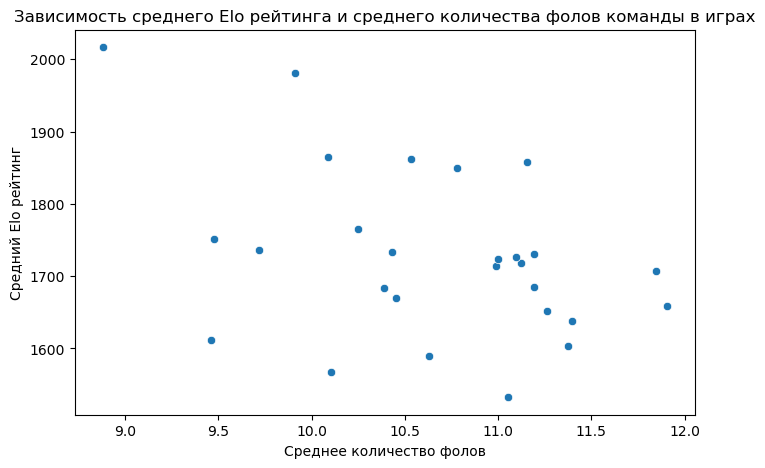

In [291]:
plt.figure(figsize=(8, 5))
plt.title('Зависимость среднего Elo рейтинга и среднего количества фолов команды в играх')
plt.xlabel('Среднее количество фолов')
plt.ylabel('Средний Elo рейтинг')

sns.scatterplot(data=df_fouls_grouped, x='F', y='Elo');

__На первый взгляд может показаться, что связь есть. Проверим корреляцию__

In [296]:
df_fouls.head()

,Team,F,Y,R,Referee,Elo
0,Brighton,10,2,0,J Gillett,1748.398682
1,Man United,7,0,0,M Salisbury,1793.209839
2,Everton,6,0,0,A Madley,1692.962402
3,Crystal Palace,10,3,0,T Bramall,1708.831055
4,Wolves,10,4,0,S Attwell,1711.067993


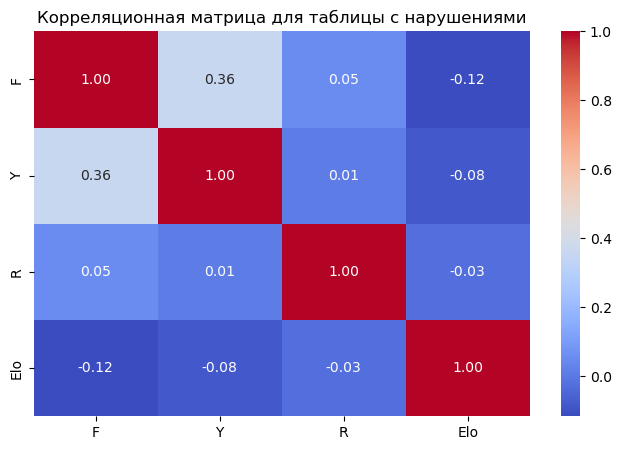

In [304]:
plt.figure(figsize=(8, 5))
plt.title('Корреляционная матрица для таблицы с нарушениями')

sns.heatmap(df_fouls.loc[:, ['F', 'Y', 'R', 'Elo']].corr(),
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm');

__Вывод:__ 
- Линейная корреляция между количеством фолов и рейтингом силы довольно маленькая, но отрицательная
- Корреляция между количеством фолов и полученными желтыми карточками повыше, но все еще не очень большая. Хотя эту связь объяснить легко: нарушайте правила больше и получите больше желтых карточек

### Судьи

In [307]:
df_fouls.head()

,Team,F,Y,R,Referee,Elo
0,Brighton,10,2,0,J Gillett,1748.398682
1,Man United,7,0,0,M Salisbury,1793.209839
2,Everton,6,0,0,A Madley,1692.962402
3,Crystal Palace,10,3,0,T Bramall,1708.831055
4,Wolves,10,4,0,S Attwell,1711.067993


In [318]:
df['Referee'].value_counts().sort_index()

Referee
A Madley         88
A Marriner      106
A Moss            1
A Taylor        165
C Kavanagh      116
C Pawson        131
D Bond            8
D Coote         103
D England        52
G Scott          69
J Brooks         41
J Gillett        40
J Moss          101
J Smith           4
K Friend         95
L Mason          46
L Probert        18
L Smith           2
M Atkinson      113
M Dean          107
M Oliver        162
M Salisbury      29
O Langford        1
P Bankes         67
P Tierney       141
R East           10
R Jones          61
R Madley          2
R Welch           1
S Allison         3
S Attwell       123
S Barrott        12
S Hooper         92
S Scott           1
S Singh           1
T Bramall        14
T Harrington     17
T Robinson       21
Name: count, dtype: int64

Посмотрим, как сильно по-разному могут работать судьи

Соберем датафрейм, где просуммируем все нарушения и карточки обеих команд в матче, а потом найдем среднее количество каждого показателя по судьям. 

Чтобы убрать выбросы, возьмем только тех судей, которые отработали хотя бы 10 матчей

In [317]:
df_ref = df.loc[:, ['HF', 'AF', 'HY', 'AY', 'HR', 'AR', 'Referee']]
df_ref['F'] = df['HF'] + df['AF']
df_ref['Y'] = df['HY'] + df['AY']
df_ref['R'] = df['HR'] + df['AR']

df_ref_grouped = df_ref.groupby('Referee')[['F', 'Y', 'R']].agg('mean')[df['Referee'].value_counts().sort_index() >= 10]
df_ref_grouped.sort_values('F')

,F,Y,R
Referee,,,
A Marriner,18.226415,2.726415,0.094340
M Atkinson,19.345133,2.725664,0.088496
J Gillett,19.450000,3.575000,0.050000
S Barrott,19.666667,3.333333,0.083333
G Scott,19.913043,2.695652,0.188406
S Attwell,20.113821,3.658537,0.121951
L Probert,20.277778,2.555556,0.222222
K Friend,20.347368,3.157895,0.136842
J Moss,20.386139,3.000000,0.128713


In [338]:
df['Referee'].isin((df['Referee'].value_counts().sort_index() >= 10).index)

0       True
1       True
2       True
3       True
4       True
        ... 
2159    True
2160    True
2161    True
2162    True
2163    True
Name: Referee, Length: 2164, dtype: bool

In [231]:
df['Referee'].value_counts()

Referee
A Taylor        165
M Oliver        162
P Tierney       141
C Pawson        131
S Attwell       123
C Kavanagh      116
M Atkinson      113
M Dean          107
A Marriner      106
D Coote         103
J Moss          101
K Friend         95
S Hooper         92
A Madley         88
G Scott          69
P Bankes         67
R Jones          61
D England        52
L Mason          46
J Brooks         41
J Gillett        40
M Salisbury      29
T Robinson       21
L Probert        18
T Harrington     17
T Bramall        14
S Barrott        12
R East           10
D Bond            8
J Smith           4
S Allison         3
L Smith           2
R Madley          2
R Welch           1
A Moss            1
S Scott           1
O Langford        1
S Singh           1
Name: count, dtype: int64